<a href="https://colab.research.google.com/github/MatewosTegete/PRODIGY_DS_04/blob/main/Prodogy_DS_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 4: Analyzing and Visualizing sentiment patterns in social media data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
tw_train = pd.read_csv("/content/drive/MyDrive/Prodigy_InfoTech/twitter_training.csv")
tw_validate = pd.read_csv("/content/drive/MyDrive/Prodigy_InfoTech/twitter_validation.csv")

In [ ]:
tw_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
tw_train.rename(columns={'2401': 'ID', 'Borderlands':'Platform', 'Positive': 'Feeling', 'im getting on borderlands and i will murder you all ,': 'Comment'}, inplace=True)
tw_train.head()

,ID,Platform,Feeling,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
tw_train.isnull().sum()

ID            0
Platform      0
Feeling       0
Comment     686
dtype: int64

In [ ]:
tw_train['Platform'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

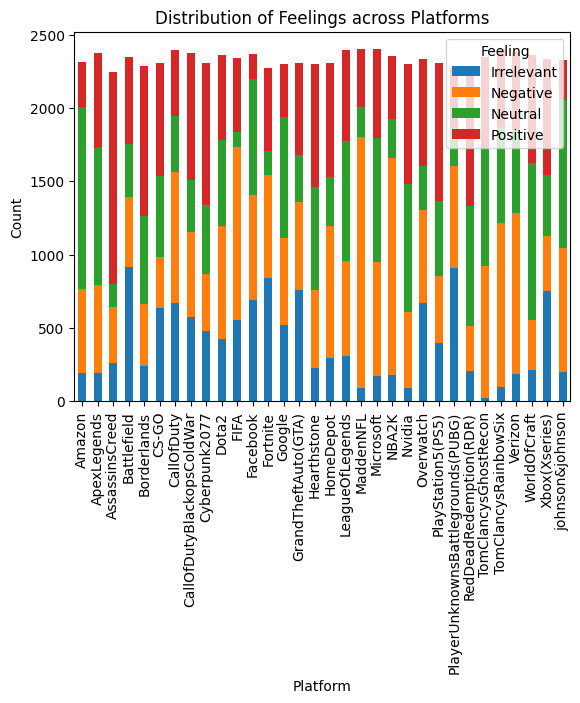

In [ ]:
feeling_counts = tw_train.groupby("Platform")["Feeling"].value_counts().unstack()

# A bar chart to display the distribution
feeling_counts.plot(kind="bar", stacked=True)
plt.xlabel("Platform")
plt.ylabel("Count")
plt.title("Distribution of Feelings across Platforms")
plt.xticks(rotation= 'vertical')  # Rotate x-axis labels for readability
plt.show()

In [ ]:
most_negative = feeling_counts['Negative'].idxmax()
number_of_negative = feeling_counts['Negative'].max()
print('The platform with the most negative comments is', most_negative, 'And its number is', number_of_negative)

The platform with the most negative comments is MaddenNFL And its number is 1710


In [ ]:
most_positive = feeling_counts['Positive'].idxmax()
number_of_positive = feeling_counts['Positive'].max()
print('The platform with the most positive comments is', most_positive, 'And its number is', number_of_positive)

The platform with the most positive comments is AssassinsCreed And its number is 1446


In [ ]:
tw_validate.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
tw_validate.rename(columns={'3364': 'ID', 'Facebook':'Platform', 'Irrelevant': 'Feeling', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'Comment'}, inplace=True)
tw_validate.head()

,ID,Platform
0,352,1.0
1,8312,1.0
2,4371,1.0
3,4433,1.0
4,6273,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(tw_train.drop("Feeling", axis=1), tw_train["Feeling"], test_size=0.2)

imputer = SimpleImputer(strategy='most_frequent')
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

categorical_features = ["Platform"]
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train[categorical_features])
X_train = pd.concat([X_train.drop(categorical_features, axis=1), pd.DataFrame(ohe.transform(X_train[categorical_features]))], axis=1)
tw_validate = pd.concat([tw_validate.drop(categorical_features, axis=1), ohe.transform(tw_validate[categorical_features])], axis=1)

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(tw_validate)

tw_validate["Predicted Feeling"] = predictions

accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Model Accuracy: {accuracy:.4f}")